In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
import matplotlib.pyplot as plt

In [3]:
import glob

In [4]:
import os.path

In [5]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [16.0,6.0]

In [6]:
plt.rcParams["figure.max_open_warning"] = 50

In [7]:
#for filepath in glob.glob('~/20181010-1000genomes-unmapped-hhv6/NA211**.HHV6b.depth.csv'):
# python doesn't like the ~ (tilda) apparently

for filepath in glob.iglob('/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA211??.HHV6b.depth.csv'):
    print(filepath)


/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21127.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21144.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21103.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21128.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21115.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21112.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21104.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21143.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21120.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21113.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21137.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21142.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21105.HHV6b.depth.csv
/Users/jakew

In [8]:
#for filepath in glob.glob('~/20181010-1000genomes-unmapped-hhv6/NA211**.HHV6b.depth.csv'):
# python doesn't like the ~ (tilda) apparently

merged=pandas.DataFrame(columns=["position","depth"])
merged.set_index("position",inplace=True)
for filepath in glob.iglob('/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/*.HHV6a.depth.csv'):
    d = pandas.read_csv(filepath,
                    sep="\t",
                    header=None,
                    usecols=[1,2],
                    names=["position","depth"],
                    index_col="position")
    merged=merged.add(d, fill_value=0)

In [9]:
merged.head()

,depth
position,
1,1
2,1
3,1
4,1
5,1


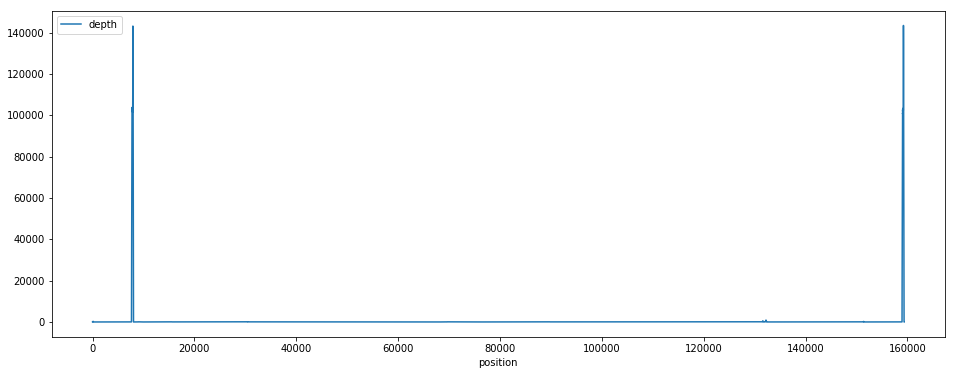

In [10]:
merged.plot()

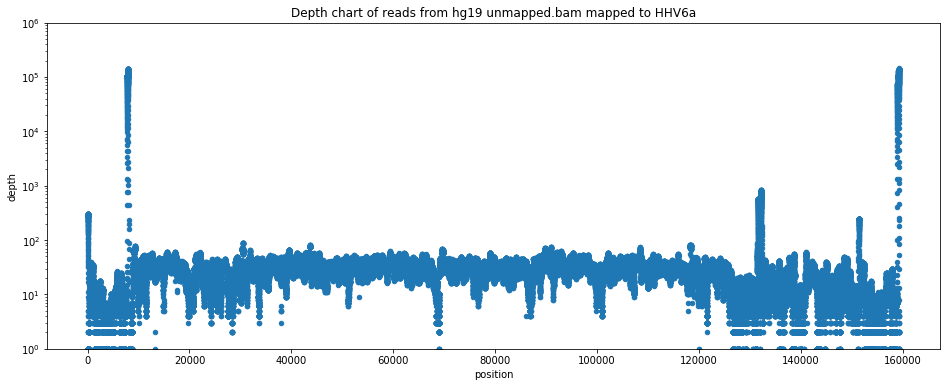

In [11]:
merged.fillna(0).reset_index().plot(
    title="Depth chart of reads from hg19 unmapped.bam mapped to HHV6a",
    logy=True,kind='scatter',x='position',y='depth',ylim=[1,1000000])

In [12]:
#for filepath in glob.glob('~/20181010-1000genomes-unmapped-hhv6/NA211**.HHV6b.depth.csv'):
# python doesn't like the ~ (tilda) apparently

merged=pandas.DataFrame(columns=["position","depth"])
merged.set_index("position",inplace=True)
for filepath in glob.iglob('/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/*.HHV6b.depth.csv'):
    d = pandas.read_csv(filepath,
                    sep="\t",
                    header=None,
                    usecols=[1,2],
                    names=["position","depth"],
                    index_col="position")
    merged=merged.add(d, fill_value=0)

In [13]:
merged.head()

,depth
position,
26,2
27,2
28,2
29,2
30,2


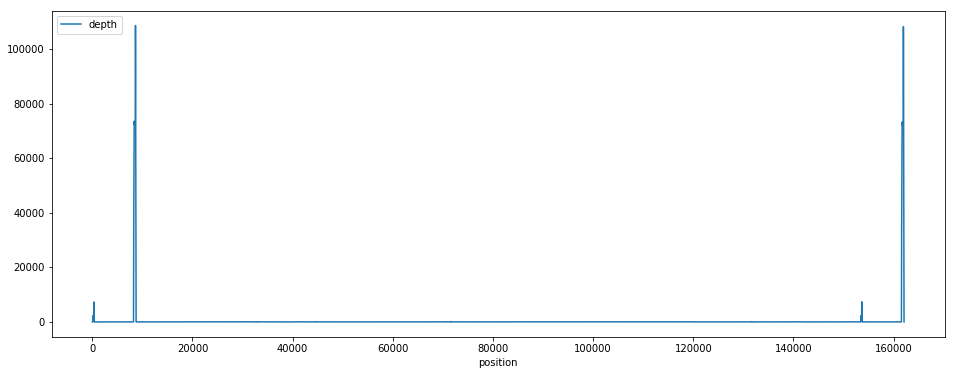

In [14]:
merged.plot()

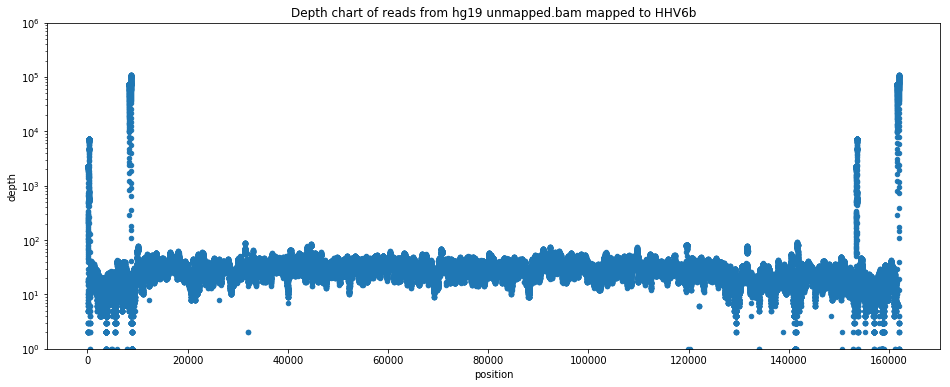

In [15]:
merged.fillna(0).reset_index().plot(
    title="Depth chart of reads from hg19 unmapped.bam mapped to HHV6b",
    logy=True,kind='scatter',x='position',y='depth',ylim=[1,1000000])

/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00123.HHV6a.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00123.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00245.HHV6a.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00245.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00362.HHV6a.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00362.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00657.HHV6a.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG00657.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG01058.HHV6a.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG01058.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG01437.HHV6a.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG01437.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/HG01858.HHV6a.depth.csv
/Users/jakew

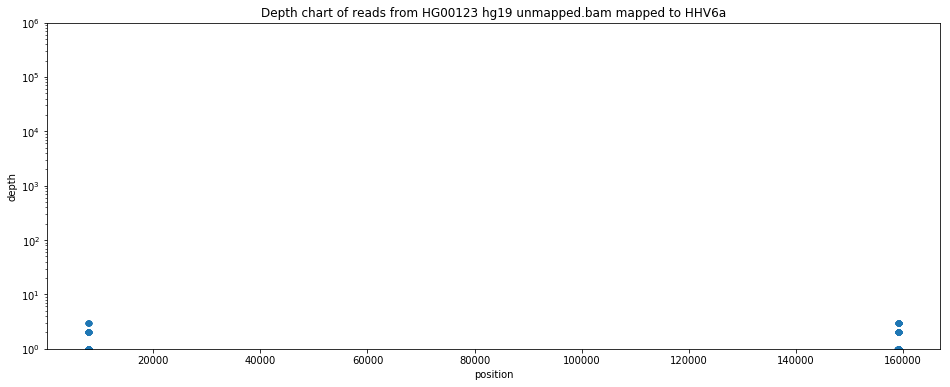

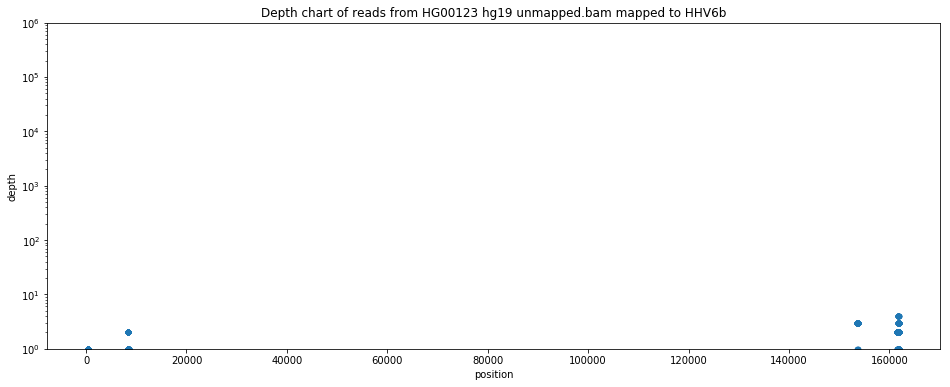

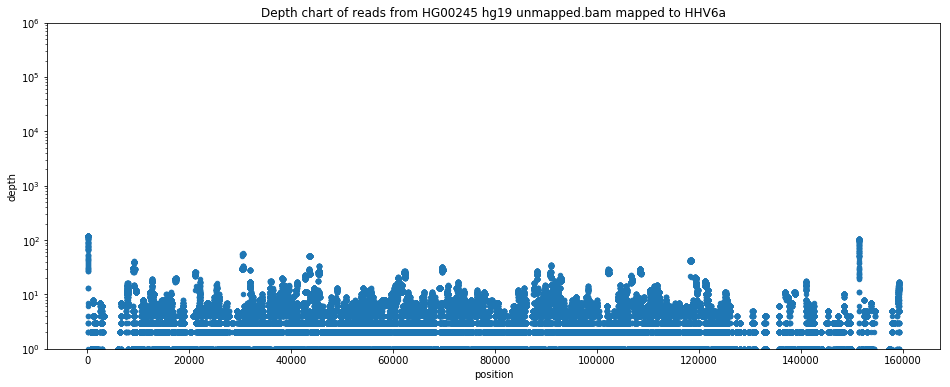

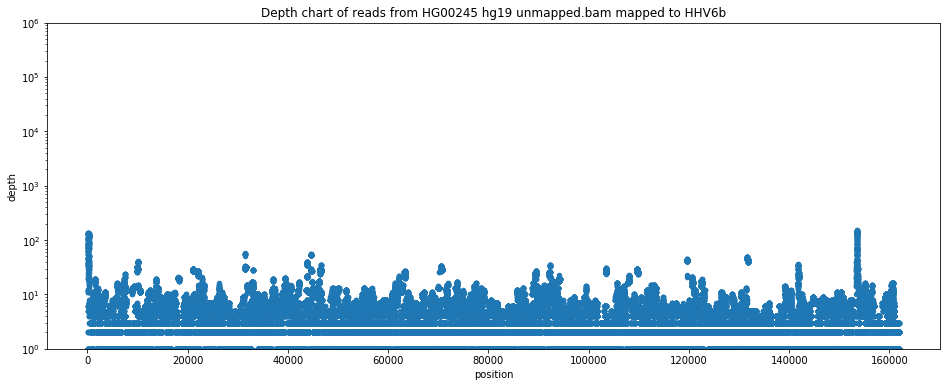

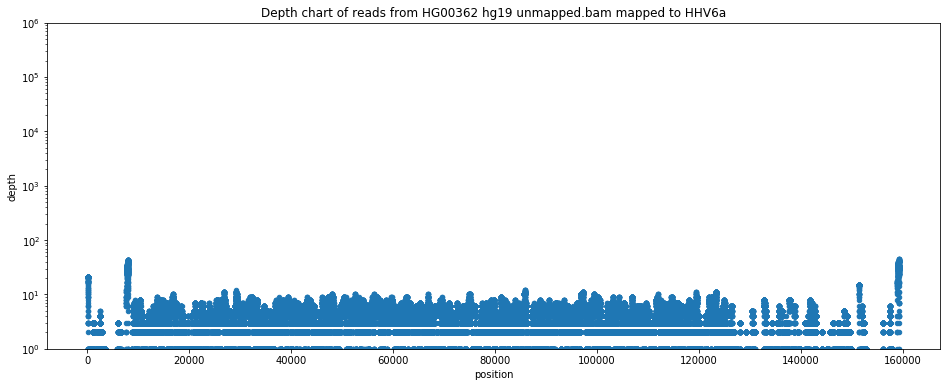

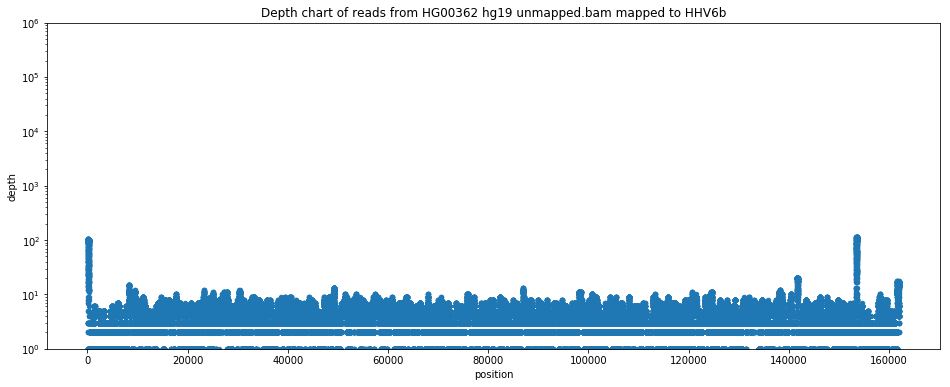

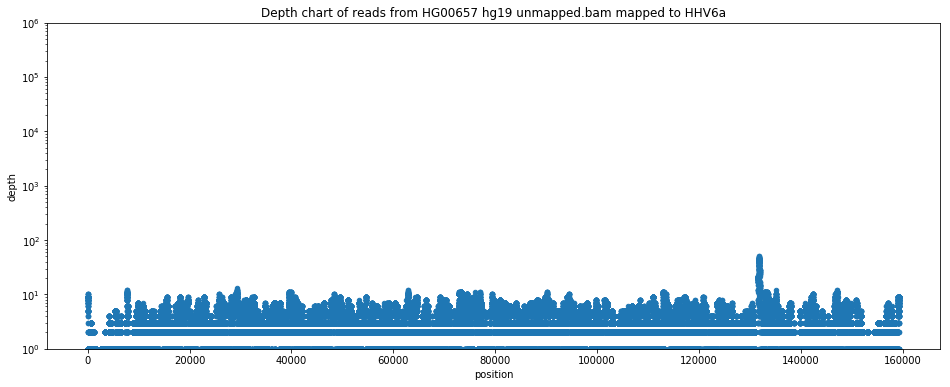

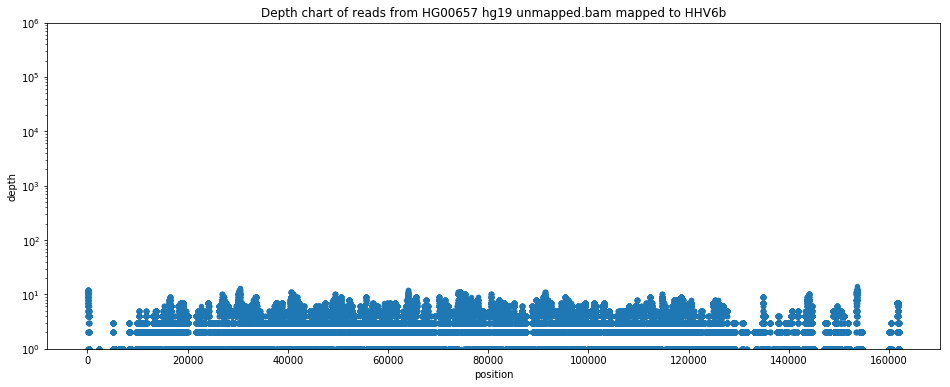

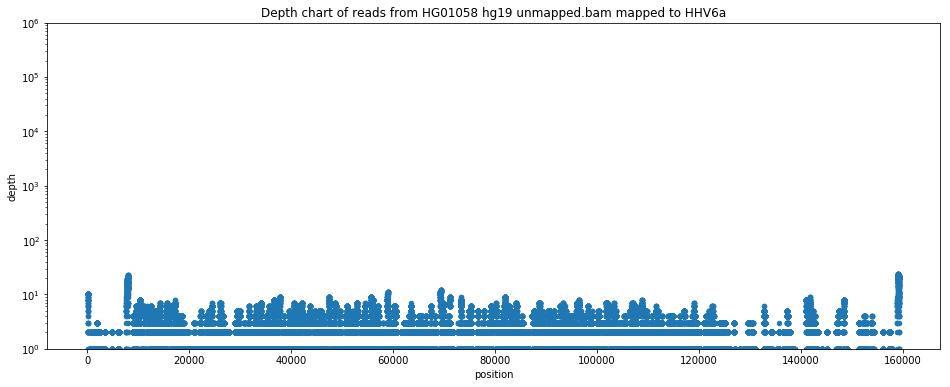

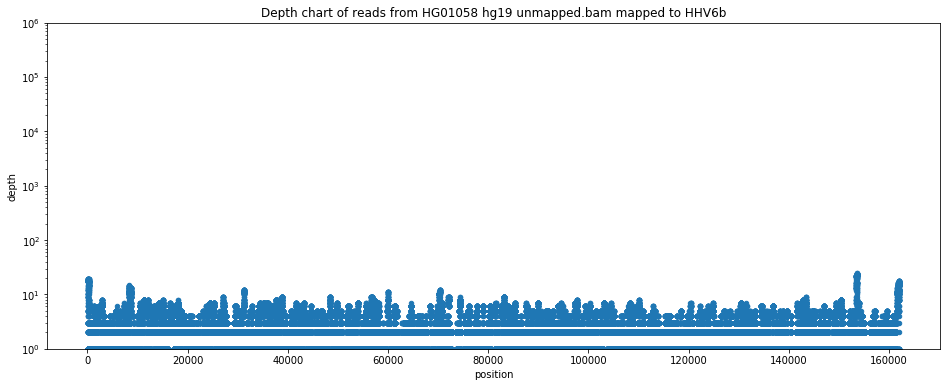

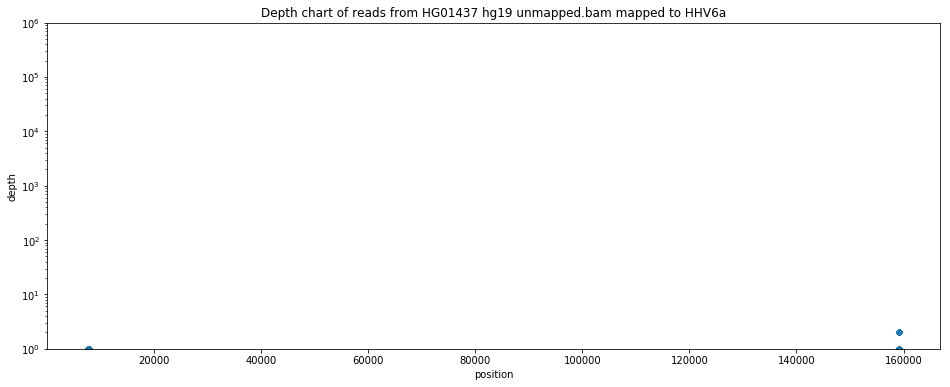

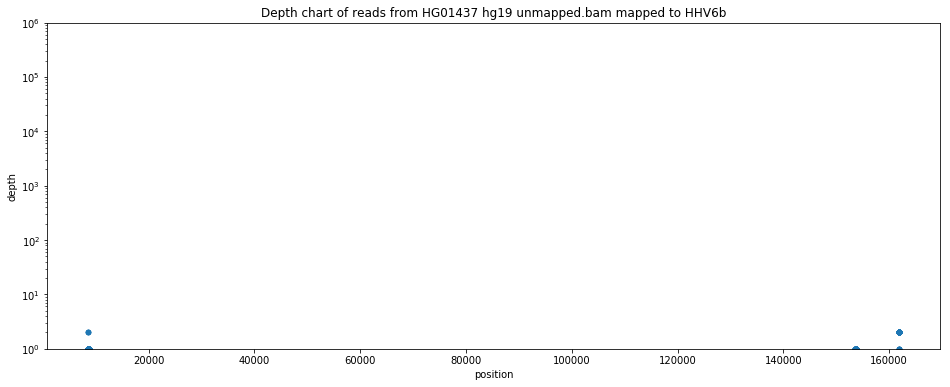

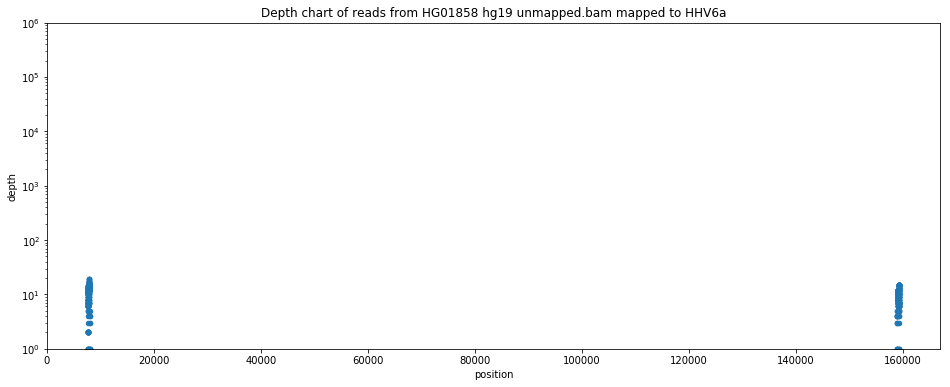

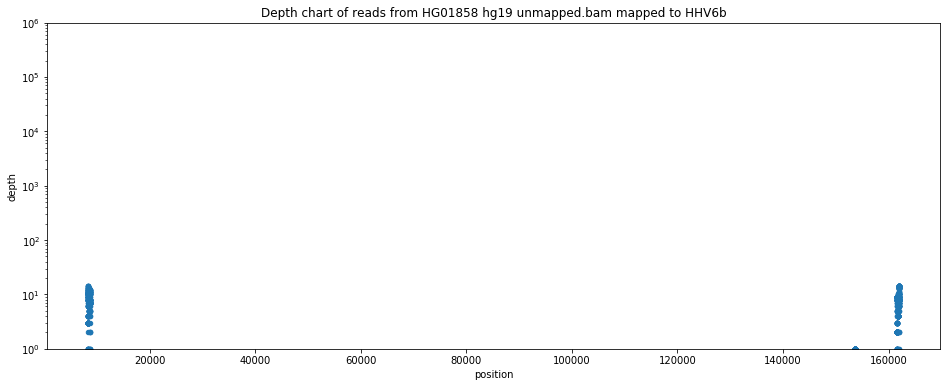

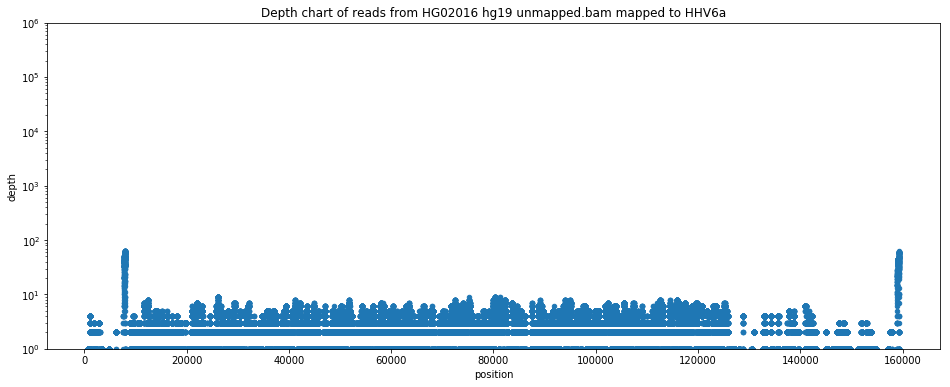

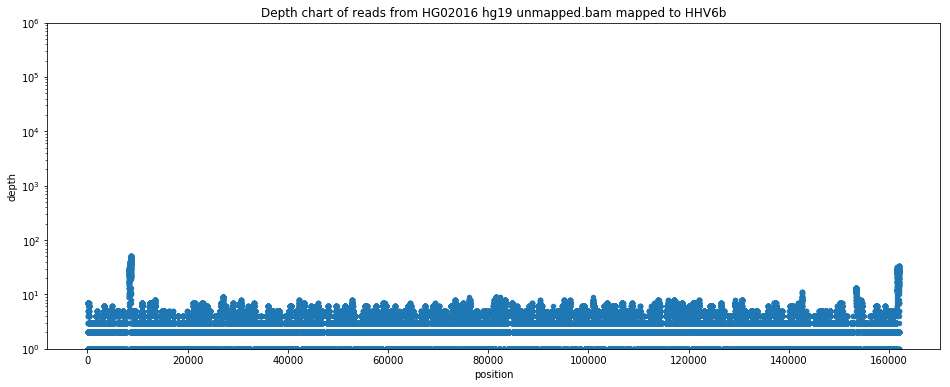

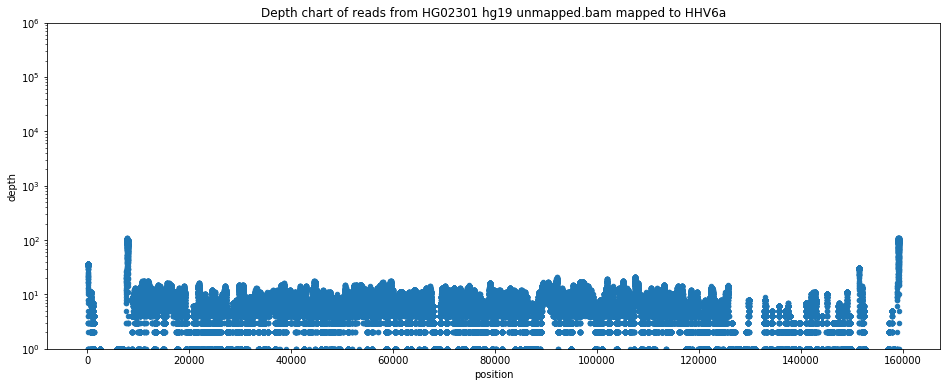

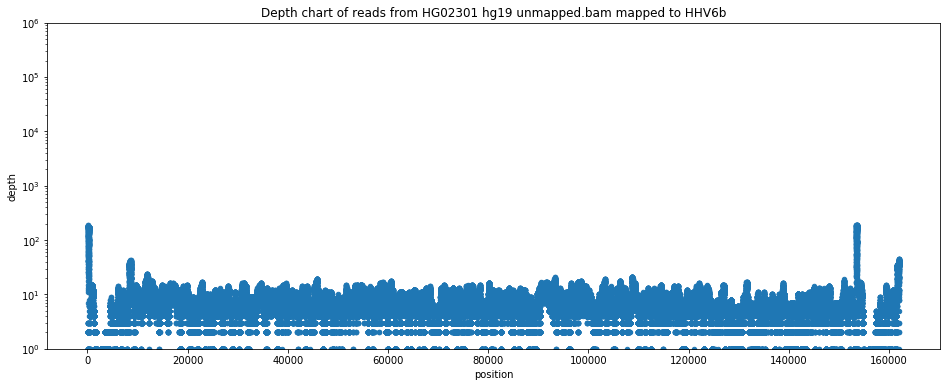

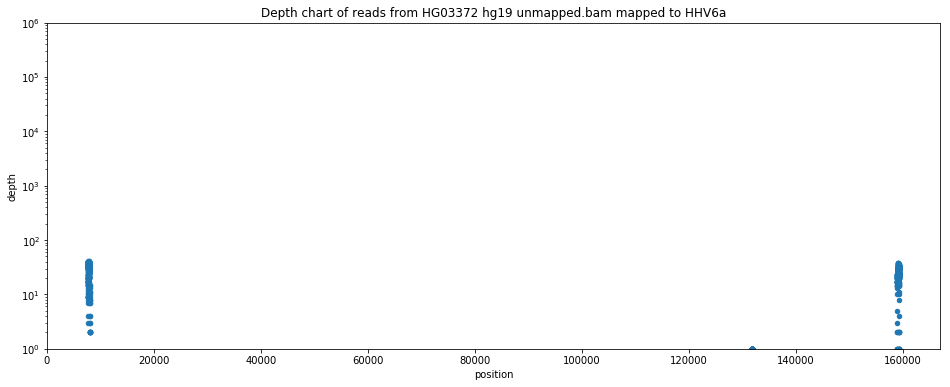

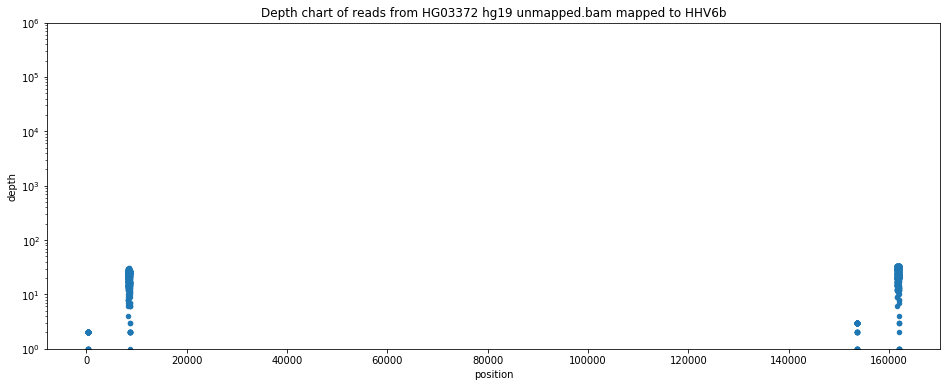

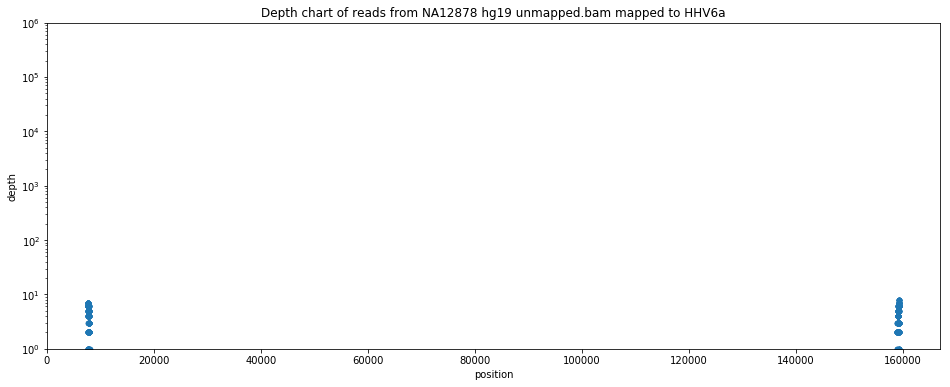

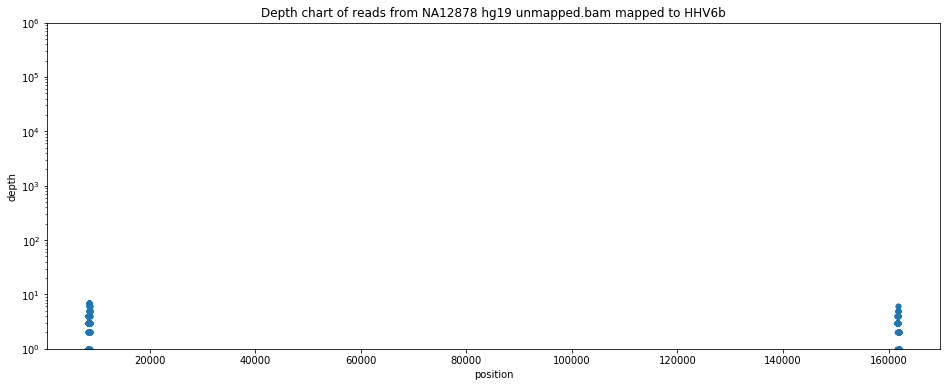

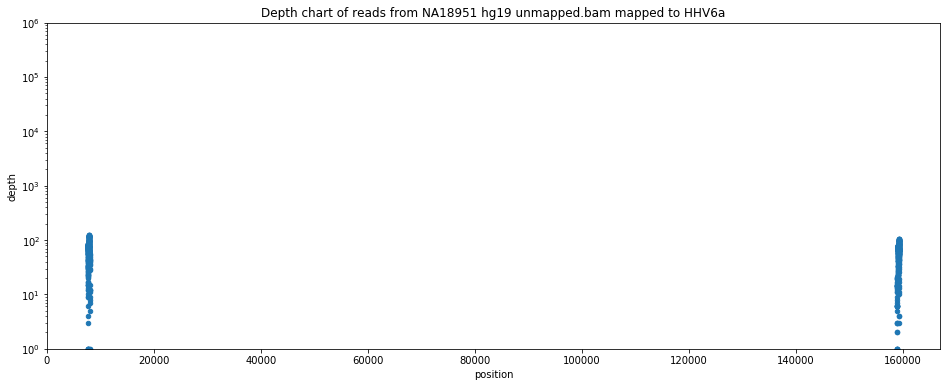

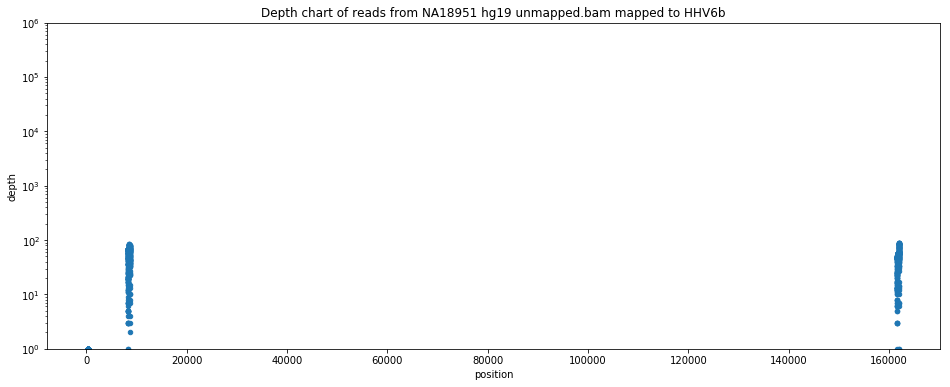

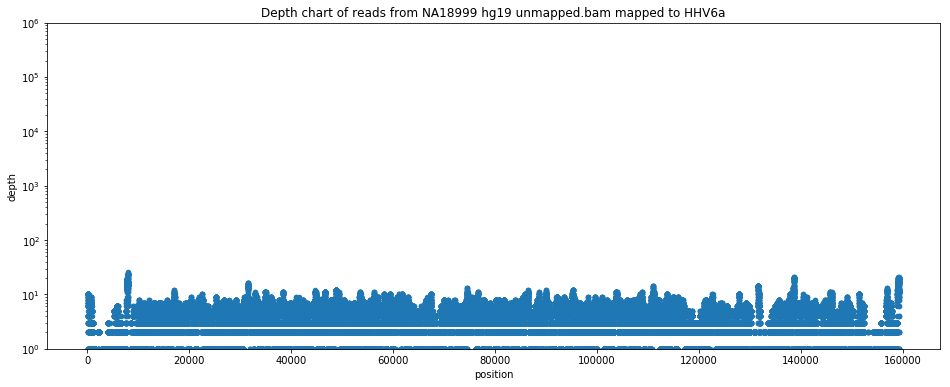

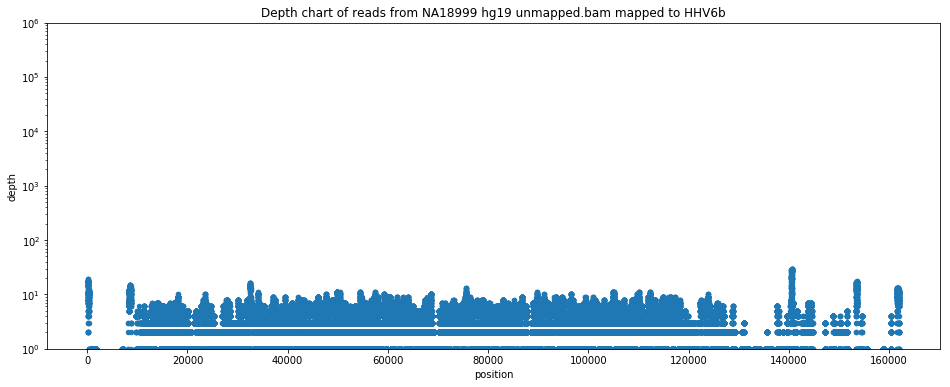

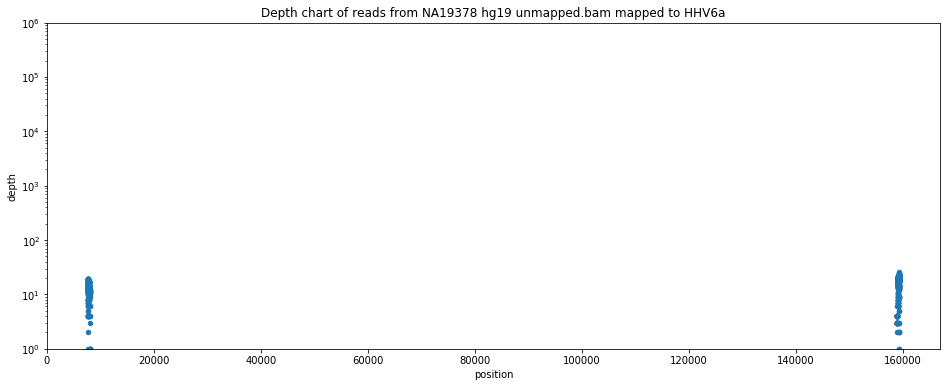

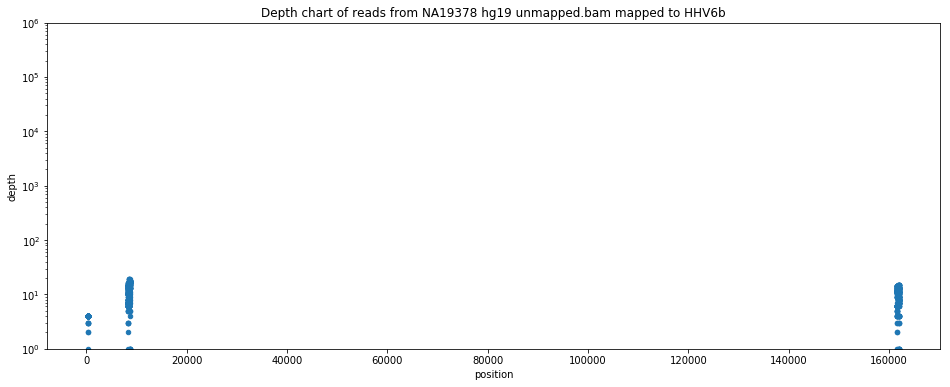

In [16]:
subjects = "HG00123 HG00245 HG00362 HG00657 HG01058 HG01437 HG01858 HG02016 HG02301 HG03372 NA12878 NA18951 NA18999 NA19378".split()

for subject in subjects:
    for v in ["HHV6a","HHV6b"]:
        filename='/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/'+subject+'.'+v+'.depth.csv'
        print(filename)
        if os.path.isfile(filename): 
            d = pandas.read_csv(filename,
                    sep="\t",
                    header=None,
                    usecols=[1,2],
                    names=["position","depth"],
                    index_col="position")

            d.fillna(0).reset_index().plot(
                title="Depth chart of reads from "+subject+" hg19 unmapped.bam mapped to "+v,
                logy=True,kind='scatter',x='position',y='depth',ylim=[1,1000000])